In [1]:
#Changer le répertoire courant pour l'import des modules
import os

current_dir = os.getcwd()

target_dir = os.path.abspath(os.path.join(current_dir, '..'))

os.chdir(target_dir)

In [2]:
from loadData import ThoraxDataLoader
import SimpleITK as sitk
import numpy as np  
import matplotlib.pyplot as plt

In [3]:
loader = ThoraxDataLoader("./Data/Data_Medical/MCsimulations")
dataset = loader.load_all_samples("HS")
newcmp = loader.newcmp

sample_0001 chargé avec succès.
sample_0002 chargé avec succès.
sample_0003 chargé avec succès.
sample_0004 chargé avec succès.
sample_0005 chargé avec succès.
sample_0006 chargé avec succès.
sample_0007 chargé avec succès.
sample_0008 chargé avec succès.
sample_0009 chargé avec succès.
sample_0010 chargé avec succès.
sample_0011 chargé avec succès.
sample_0012 chargé avec succès.
sample_0013 chargé avec succès.
sample_0014 chargé avec succès.
sample_0015 chargé avec succès.
sample_0016 chargé avec succès.
sample_0017 chargé avec succès.
sample_0018 chargé avec succès.
sample_0019 chargé avec succès.
sample_0020 chargé avec succès.
sample_0021 chargé avec succès.
sample_0022 chargé avec succès.
sample_0023 chargé avec succès.
sample_0024 chargé avec succès.
sample_0025 chargé avec succès.
sample_0026 chargé avec succès.
sample_0027 chargé avec succès.
sample_0028 chargé avec succès.
sample_0029 chargé avec succès.
sample_0030 chargé avec succès.
sample_0031 chargé avec succès.
sample_0

In [21]:
def reorder_clusters(image, labels, gmm):
    """
    Réordonne les clusters en fonction de l'intensité moyenne des pixels associés.
    
    Args:
        image (ndarray): Image d'entrée (format 2D ou 3D pour couleur).
        labels (ndarray): Masque des labels de clusters.
        gmm (GaussianMixture): Modèle GMM ajusté.

    Returns:
        ndarray: Labels réordonnés.
    """
    # Calculer l'intensité moyenne pour chaque cluster
    intensities = []
    for cluster in range(gmm.n_components):
        cluster_mask = (labels == cluster)
        mean_intensity = np.mean(image[cluster_mask])
        intensities.append((cluster, mean_intensity))
    
    # Trier les clusters par intensité moyenne
    sorted_clusters = sorted(intensities, key=lambda x: x[1])
    
    # Créer une table de correspondance pour les labels
    label_map = {old: new for new, (old, _) in enumerate(sorted_clusters)}
    
    # Réordonner les labels
    reordered_labels = np.vectorize(label_map.get)(labels)
    
    return reordered_labels

In [22]:
from sklearn.mixture import GaussianMixture

segmented_dataset = []

for sample in dataset :
    sample_flat = sample.flatten().reshape(-1, 1)
    gmm = GaussianMixture(n_components=4)
    gmm.fit(sample_flat)

    segmented_sample = gmm.predict(sample_flat)
    segmented_sample = segmented_sample.reshape(sample.shape)

    segmented_sample =  reorder_clusters(sample, segmented_sample, gmm)

    segmented_dataset.append(segmented_sample)


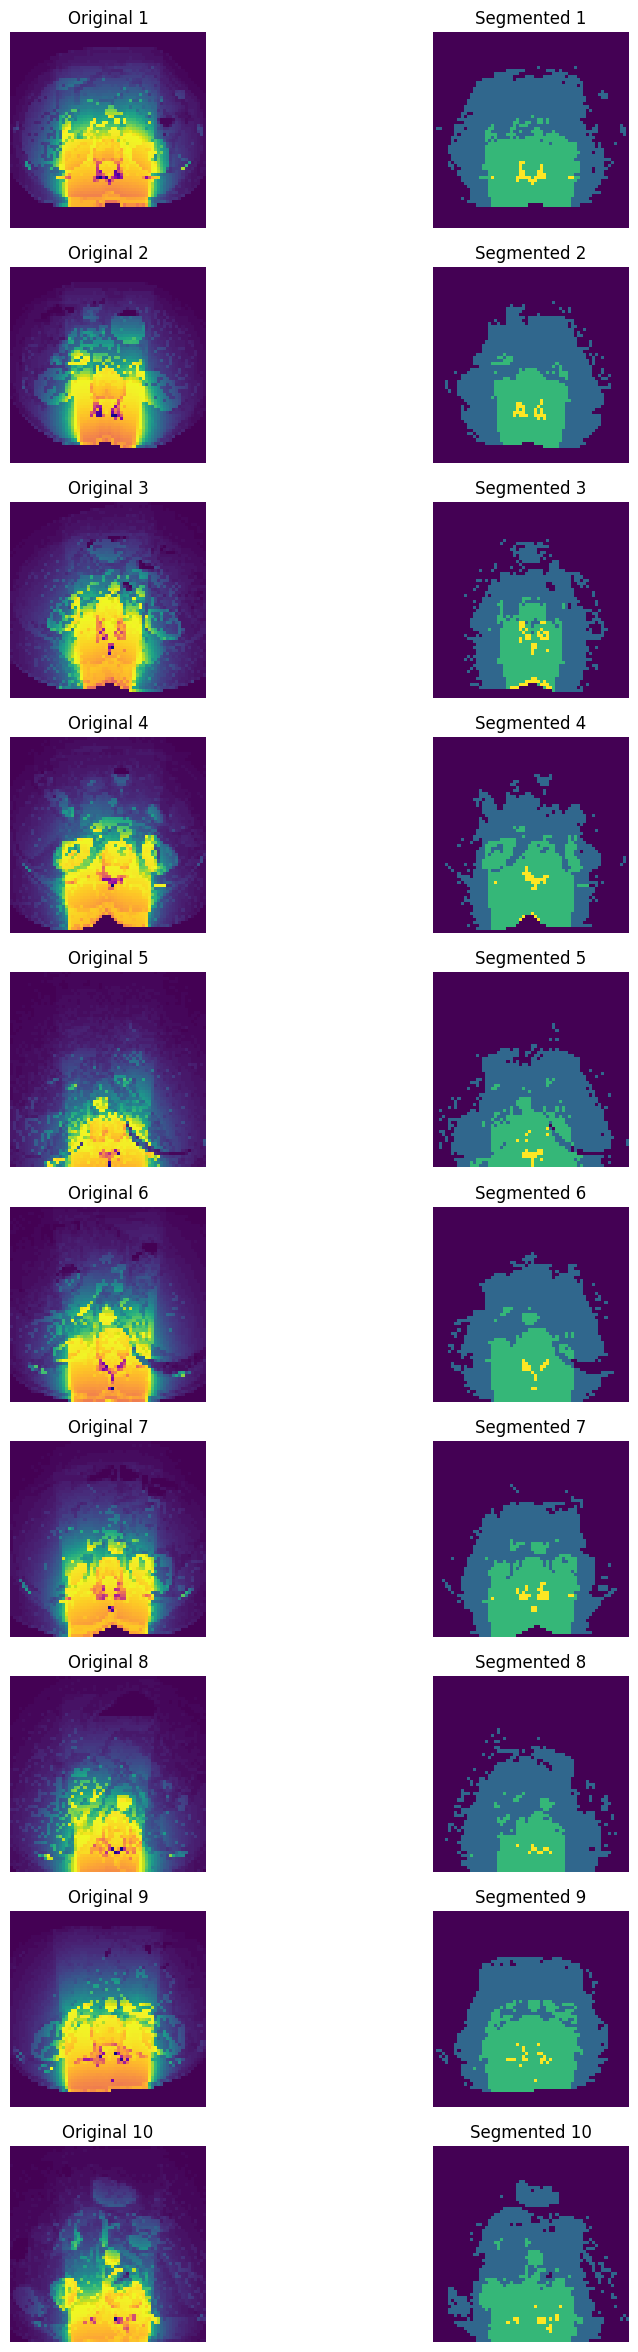

In [26]:
fig, axes = plt.subplots(10, 2, figsize=(10, 10 * 3))

for i in range(10):

    rd_int = np.random.randint(0, len(segmented_dataset))

    original_sample = dataset[rd_int]
    segmented_sample = segmented_dataset[rd_int]

    # Afficher l'image originale
    axes[i, 0].imshow(original_sample, cmap=newcmp)
    axes[i, 0].set_title(f"Original {i+1}")
    axes[i, 0].axis("off")

    # Afficher l'image segmentée
    axes[i, 1].imshow(segmented_sample, cmap="viridis")  # Utiliser une colormap pour les segments
    axes[i, 1].set_title(f"Segmented {i+1}")
    axes[i, 1].axis("off")

plt.show()

In [29]:
segmented_dataset = np.array(segmented_dataset)

In [30]:
segmented_dataset.shape

(6560, 64, 64)

In [31]:
np.save("segmentation.npy", segmented_dataset)